### Importing the libraries

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

### Loading the data

In [47]:
suv_data = pd.read_csv("C:/Users/Digant/Downloads/suv_data.csv")
suv_data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Data Visualization

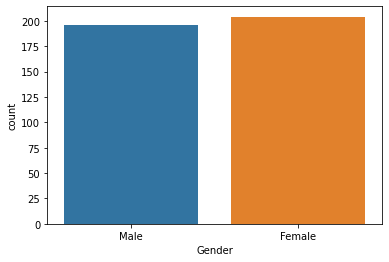

In [48]:
sns.countplot("Gender", data=suv_data)
plt.show()

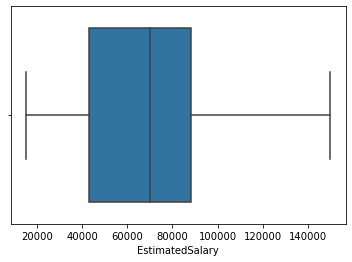

In [49]:
sns.boxplot("EstimatedSalary", data=suv_data)
plt.show()

In [43]:
suv_data.isnull().sum()          # No null values found

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Conversions required for Logistic Regression

In [50]:
gender = pd.get_dummies(suv_data["Gender"], drop_first=True)

In [51]:
suv_data = pd.concat([suv_data,gender], axis=1)
suv_data.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0


In [53]:
suv_data.drop(["User ID","Gender"], axis=1, inplace=True)
suv_data.head(3)

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0


In [61]:
x = suv_data.drop(["Purchased"], axis=1)
y = suv_data["Purchased"]

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state = 10)

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [68]:
lmo = LogisticRegression()
lmo.fit(x_train,y_train)
predictions = lmo.predict(x_test)

In [69]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        88
           1       0.81      0.77      0.79        44

    accuracy                           0.86       132
   macro avg       0.85      0.84      0.84       132
weighted avg       0.86      0.86      0.86       132

[[80  8]
 [10 34]]
0.8636363636363636
